In [59]:
import random
import numpy as np
import sympy as sp
import math
import matplotlib.pyplot as plt
from Crypto.Util import number
import time
import sys, threading
from math import sqrt,floor

sys.setrecursionlimit(10**7)
threading.stack_size(2**27)




134217728

# Utility functions for RSA

In [60]:
def ConvertToInt(message_str):
  res = 0
  for i in range(len(message_str)):
    res = res * 256 + ord(message_str[i])
  return res

def ConvertToStr(n):
    res = ""
    while n > 0:
        res += chr(n % 256)
        n //= 256
    return res[::-1]

# this is an R2L recursive implementation that works for large integers
def PowMod(a, n, mod): 
    if n == 0:
        return 1 % mod
    elif n == 1:
        return a % mod
    else:
        b = PowMod(a, n // 2, mod)
        b = b * b % mod
        if n % 2 == 0:
          return b
        else:
          return b * a % mod



# REQ1) RSA functions

In [61]:

def RSA(n_bits):
    p = number.getPrime(n_bits // 2)
    q = number.getPrime(n_bits // 2)
    while p == q:
        q = number.getPrime(n_bits // 2)
    n=p*q
    phi=(p-1)*(q-1)
    e=random.randint(2,phi)
    while sp.gcd(e,phi) != 1:
        e=random.randint(2,phi) 

    d=sp.mod_inverse(e,phi)
    pu=e,n
    pr=d,n
    return pu,pr

def Encrypt(message,pu):
    e,n=pu
    return PowMod(message,e,n)

def Decrypt(cipher,pr):
    d,n=pr
    return PowMod(cipher,d,n)
    

# REQ3) RSA     encryption time - nbits

In [62]:
#key generation loop for req3

message="A"
message_int=ConvertToInt(message)

#make x linspace of range 1 to 1024
low=8
end=512
x=np.linspace(low,end,end-low+1)
#print(x[:200])
y=[]

keys=[]
for i in x:
    (e,n),(d,n)=RSA(int(i))
    keys.append((e,n))
    
   


In [63]:
counter=0

for i in x:
    elapsed_time=0
    (e,n)=keys[counter]
    for j in range(100):
        
        st=time.time()
        cipher=Encrypt(message_int,(e,n))
        et=time.time()
        elapsed_time+=(et-st)
    y.append(elapsed_time/100)
    counter+=1
    

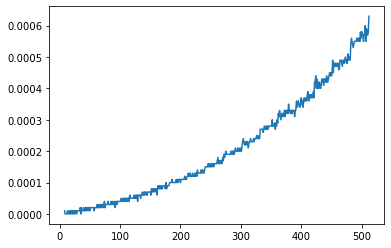

In [64]:
plt.plot(x, y)
plt.show()


# Req4

In [65]:
#break RSA  for req 4
def break_RSA(pu):
    e,n=pu
    #get p,q
    for i in range(2,n//2):
        if n%i==0:
            p=i
            q=n//i
            break
    


    return p,q

(pu,_)=RSA(32)
print(pu)
p,q=break_RSA(pu)
assert(p*q==pu[1])

(698647693, 2039068253)


In [66]:
#loop to generate keys
keys_to_break=[]

lower_range=8
upper_range=50
for i in range(lower_range,upper_range):
    (e,n),(d,n)=RSA(int(i))
    keys_to_break.append((e,n))

counter=0
time_array=[]
for i in range(lower_range,upper_range):
    time_taken=0
    #for k in range(1,2):
    st=time.time()
    p,q=break_RSA(keys_to_break[counter])
    et=time.time()
    time_taken=(et-st)
    time_array.append(time_taken)
    print(i,time_taken)
        
    counter+=1


    
 

8 0.0
9 0.0
10 0.0
11 0.0
12 0.0
13 0.0
14 0.0
15 0.0
16 0.0
17 0.0
18 0.0
19 0.0
20 0.0
21 0.0
22 0.001001596450805664
23 0.0
24 0.0
25 0.0009987354278564453
26 0.0
27 0.0
28 0.0
29 0.0
30 0.0009996891021728516
31 0.0020003318786621094
32 0.004000663757324219
33 0.003003835678100586
34 0.010996580123901367
35 0.007999181747436523
36 0.02199864387512207
37 0.018001079559326172
38 0.029999256134033203
39 0.03399825096130371
40 0.07400012016296387
41 0.069000244140625
42 0.16099929809570312
43 0.20100069046020508
44 0.46399831771850586
45 0.247999906539917
46 0.8200018405914307
47 0.7890903949737549
48 1.0520009994506836
49 1.114001989364624


# req4 graph 

(42,)
(42,)


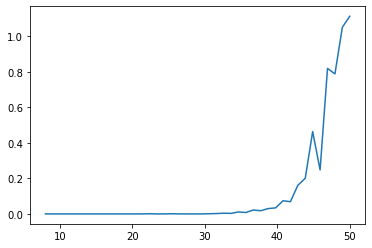

In [67]:

x_break=np.linspace(lower_range,upper_range,upper_range-lower_range)
print(x_break.shape)
print(np.array(time_array).shape)

plt.plot(x_break,time_array)
plt.show()

# Req 5

# Chosen Cipertext attack 
We have Alice who sends a message "M" to Bob encryoted with his public key (e,n). The encrypted message is C = M^e mod N

Eve intercepts C but can not decrypt it. So, Eve multiply C by a random number r raised to the power e and all modulo N. 
C_eve = C * r^e mod N

Then he sends it to Bob who decrypts it to C_eve^d mod N

Eve can now recover the original message M by multiplying the result from Bob by r^-1 mod N

(r ^ -1 )*(C_eve ^ d) Ξ (r ^-1 ) * ((C * (r^e))^d) Ξ (r ^-1) * (C^d) * (r^ed) Ξ (r ^ -1 ) * M * r Ξ M mod N 


In [68]:
# First generate the RSA at Bob's side
pu,pr = RSA(640)

e,n = pu

# Alice wants to send A message

message = "Hello I am Alice"
num = ConvertToInt(message)

cipher = Encrypt(num, pu )
print("Cipher is " + str(cipher))

# Eve can see the encrypted ciphrt
# Eve selects a random number
r = 250

# Eve encrypts r with the public key 
r_cipher = Encrypt(r, pu)

# Eve multiplies it by cipher mod N
cipher_2 = (r_cipher * cipher) % n

# Eve sends cipher_2 to Bob who decrypts it and send her what do you mean by this "result"

result = Decrypt(cipher_2, pr)

# Then Eve multiplies r_inverse by cipher_2 to get the message
recovered_num = ( sp.mod_inverse(r,n) * result) % n

recovered_messa = ConvertToStr(recovered_num)

print("###########################################")
print("Eve: The message = " + recovered_messa)
print("###########################################")

    

Cipher is 2105311483801309281954248444440412920697507045138368962176489223992048853929238354266164241032529673473069416301894867242000042016071570167557168370223797520600588134200797458098186401302027587
###########################################
Eve: The message = Hello I am Alice
###########################################
